## price pattern recognization

In [1]:
import talib
import pandas as pd
import tushare as tu
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

Populating the interactive namespace from numpy and matplotlib


In [45]:
df_ldkg = tu.get_hist_data('600606',start='2014-03-18')
from pandas_datareader import data as web
start = datetime.datetime(2014,1,1)
end = datetime.date.today()
#df_ldkg = web.DataReader("ULBI", "yahoo", start, end)


In [48]:
df_ldkg.columns = [x.lower() for x in df_ldkg.columns]#compatible from tushare
df_ldkg.head()

,open,high,low,close,volume,adj close
Date,,,,,,
2014-01-02,3.50,3.55,3.44,3.51,25200,3.51
2014-01-03,3.47,3.54,3.42,3.49,39400,3.49
2014-01-06,3.53,3.55,3.41,3.45,16100,3.45
2014-01-07,3.47,3.55,3.43,3.47,15800,3.47
2014-01-08,3.42,3.50,3.37,3.37,16300,3.37


In [49]:
ldkg = df_ldkg[['open','high','close','low']]#input for pattern recognization
ldkg.tail()

,open,high,close,low
Date,,,,
2016-12-20,4.91,4.95,4.90,4.85
2016-12-21,4.86,4.89,4.76,4.70
2016-12-22,4.80,4.85,4.85,4.70
2016-12-23,4.75,4.86,4.80,4.70
2016-12-27,4.75,4.84,4.75,4.70


In [5]:
print talib.get_function_groups().keys()

['Pattern Recognition', 'Volume Indicators', 'Math Transform', 'Math Operators', 'Cycle Indicators', 'Volatility Indicators', 'Overlap Studies', 'Statistic Functions', 'Momentum Indicators', 'Price Transform']


In [6]:
?talib.CDLDOJI

In [50]:
doji=talib.CDLDOJI(ldkg['open'].values,ldkg['high'].values,ldkg['low'].values,ldkg['close'].values)
doji

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

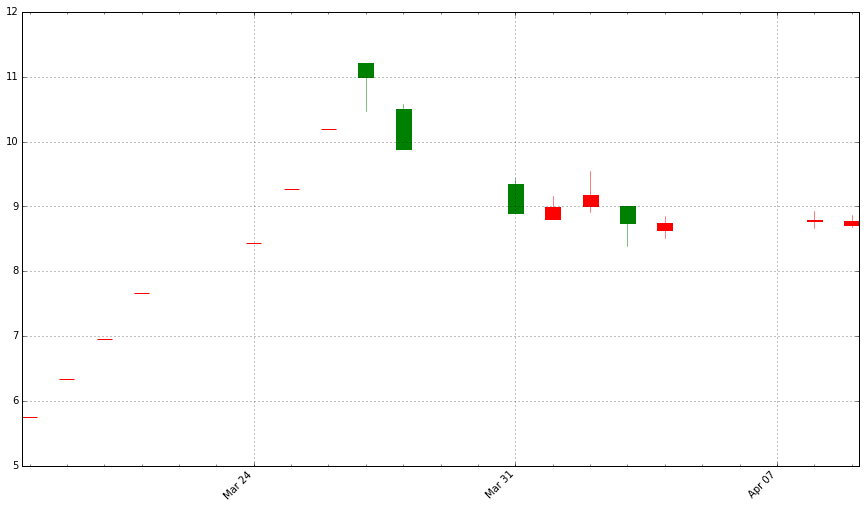

In [29]:
import pandaStock
pandaStock.pandas_candlestick_ohlc(ldkg.iloc[-16:])

In [10]:
patternFun=talib.get_function_groups()['Pattern Recognition']
para = "(%s['open'].values,%s['high'].values,%s['low'].values,%s['close'].values)" %tuple(['ldkg']*4)
para

"(ldkg['open'].values,ldkg['high'].values,ldkg['low'].values,ldkg['close'].values)"

In [11]:
patterFunStr=map(lambda x: "talib.%s"%x+para, patternFun)
patterFunStr[0]

"talib.CDL2CROWS(ldkg['open'].values,ldkg['high'].values,ldkg['low'].values,ldkg['close'].values)"

In [15]:
def patterns(ohcl):
    patternFun=talib.get_function_groups()['Pattern Recognition']
    input = [ohcl['open'].values,ohcl['high'].values,ohcl['low'].values,ohcl['close'].values]
    for f in patternFun:
        ohcl[f]=eval("talib.%s(*input)"%f)
#patterns(ldkg)

In [18]:
import patternRecognize
patternRecognize.patterns(ldkg)
ldkg.head()

,open,high,close,low,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,...,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
date,,,,,,,,,,,,,,,,,,,,,
2016-12-28,8.73,8.77,8.65,8.64,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-12-27,8.72,8.95,8.76,8.69,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-12-26,8.85,8.85,8.75,8.53,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-12-23,9.01,9.02,8.87,8.83,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-12-22,9.06,9.06,9.01,8.97,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
ldkg.shape

(662, 65)

In [20]:
len(patternFun)

61

In [18]:
map(lambda x:nonzero(ldkg.iloc[x]),range(len(ldkg)))

[(array([0, 1, 2, 3]),),
 (array([0, 1, 2, 3]),),
 (array([0, 1, 2, 3]),),
 (array([0, 1, 2, 3]),),
 (array([0, 1, 2, 3]),),
 (array([0, 1, 2, 3]),),
 (array([0, 1, 2, 3]),),
 (array([ 0,  1,  2,  3, 44]),),
 (array([ 0,  1,  2,  3, 22]),),
 (array([0, 1, 2, 3]),),
 (array([ 0,  1,  2,  3, 15, 42]),),
 (array([0, 1, 2, 3]),),
 (array([0, 1, 2, 3]),),
 (array([0, 1, 2, 3]),),
 (array([ 0,  1,  2,  3, 22, 42]),),
 (array([ 0,  1,  2,  3, 29]),),
 (array([ 0,  1,  2,  3, 22, 32, 54]),),
 (array([ 0,  1,  2,  3, 31, 55]),),
 (array([0, 1, 2, 3]),),
 (array([ 0,  1,  2,  3, 22]),),
 (array([ 0,  1,  2,  3, 31, 55]),),
 (array([ 0,  1,  2,  3, 54]),),
 (array([ 0,  1,  2,  3, 32]),),
 (array([ 0,  1,  2,  3, 19, 31, 41, 50, 55]),),
 (array([ 0,  1,  2,  3, 22]),),
 (array([ 0,  1,  2,  3,  8, 13]),),
 (array([ 0,  1,  2,  3, 19, 27, 41, 54]),),
 (array([ 0,  1,  2,  3, 19, 26, 37, 41, 54]),),
 (array([ 0,  1,  2,  3, 54]),),
 (array([ 0,  1,  2,  3, 19, 21, 27, 41, 54, 58]),),
 (array([ 0,  

In [21]:
ldkg.iloc[661]

open                     5.75
high                     5.75
close                    5.75
low                      5.75
CDL2CROWS                0.00
CDL3BLACKCROWS           0.00
CDL3INSIDE               0.00
CDL3LINESTRIKE           0.00
CDL3OUTSIDE              0.00
CDL3STARSINSOUTH         0.00
CDL3WHITESOLDIERS        0.00
CDLABANDONEDBABY         0.00
CDLADVANCEBLOCK          0.00
CDLBELTHOLD              0.00
CDLBREAKAWAY             0.00
CDLCLOSINGMARUBOZU       0.00
CDLCONCEALBABYSWALL      0.00
CDLCOUNTERATTACK         0.00
CDLDARKCLOUDCOVER        0.00
CDLDOJI                100.00
CDLDOJISTAR              0.00
CDLDRAGONFLYDOJI         0.00
CDLENGULFING             0.00
CDLEVENINGDOJISTAR       0.00
CDLEVENINGSTAR           0.00
CDLGAPSIDESIDEWHITE      0.00
CDLGRAVESTONEDOJI        0.00
CDLHAMMER                0.00
CDLHANGINGMAN            0.00
CDLHARAMI                0.00
                        ...  
CDLIDENTICAL3CROWS       0.00
CDLINNECK                0.00
CDLINVERTE